In [3]:
%config InlineBackend.figure_format = 'retina'
%pylab inline
### Libraries 
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(1, '../codes/')
from myUtils import *
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
########################## Read city file ###########################################
dfc = gpd.read_file('../data_revision/cities/all/gdfCities.shp')
dfc = dfc.to_crs("EPSG:4326")
##### world data ##############################################
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.to_crs('+proj=wintri') 

### Koppen
kg = gpd.read_file('../data_revision/climate/kg.shp')
kg = kg.to_crs('+proj=wintri')
cmap = mpl.colors.ListedColormap(['gold','navy','slategrey','yellowgreen','maroon'])

In [5]:
dfc = dfc.to_crs('+proj=wintri') 
dfc['X']=dfc['geometry'].centroid.x
dfc['Y']=dfc['geometry'].centroid.y
dfEP = pd.read_csv('../data_revision/exposure/dfEP.csv')
dfEP = pd.merge(dfEP, dfc, right_on='UC_NM_MN', left_on='city')
#dfc['suhi']=DFC['SUHI']

Text(0.5, 0, ' ')

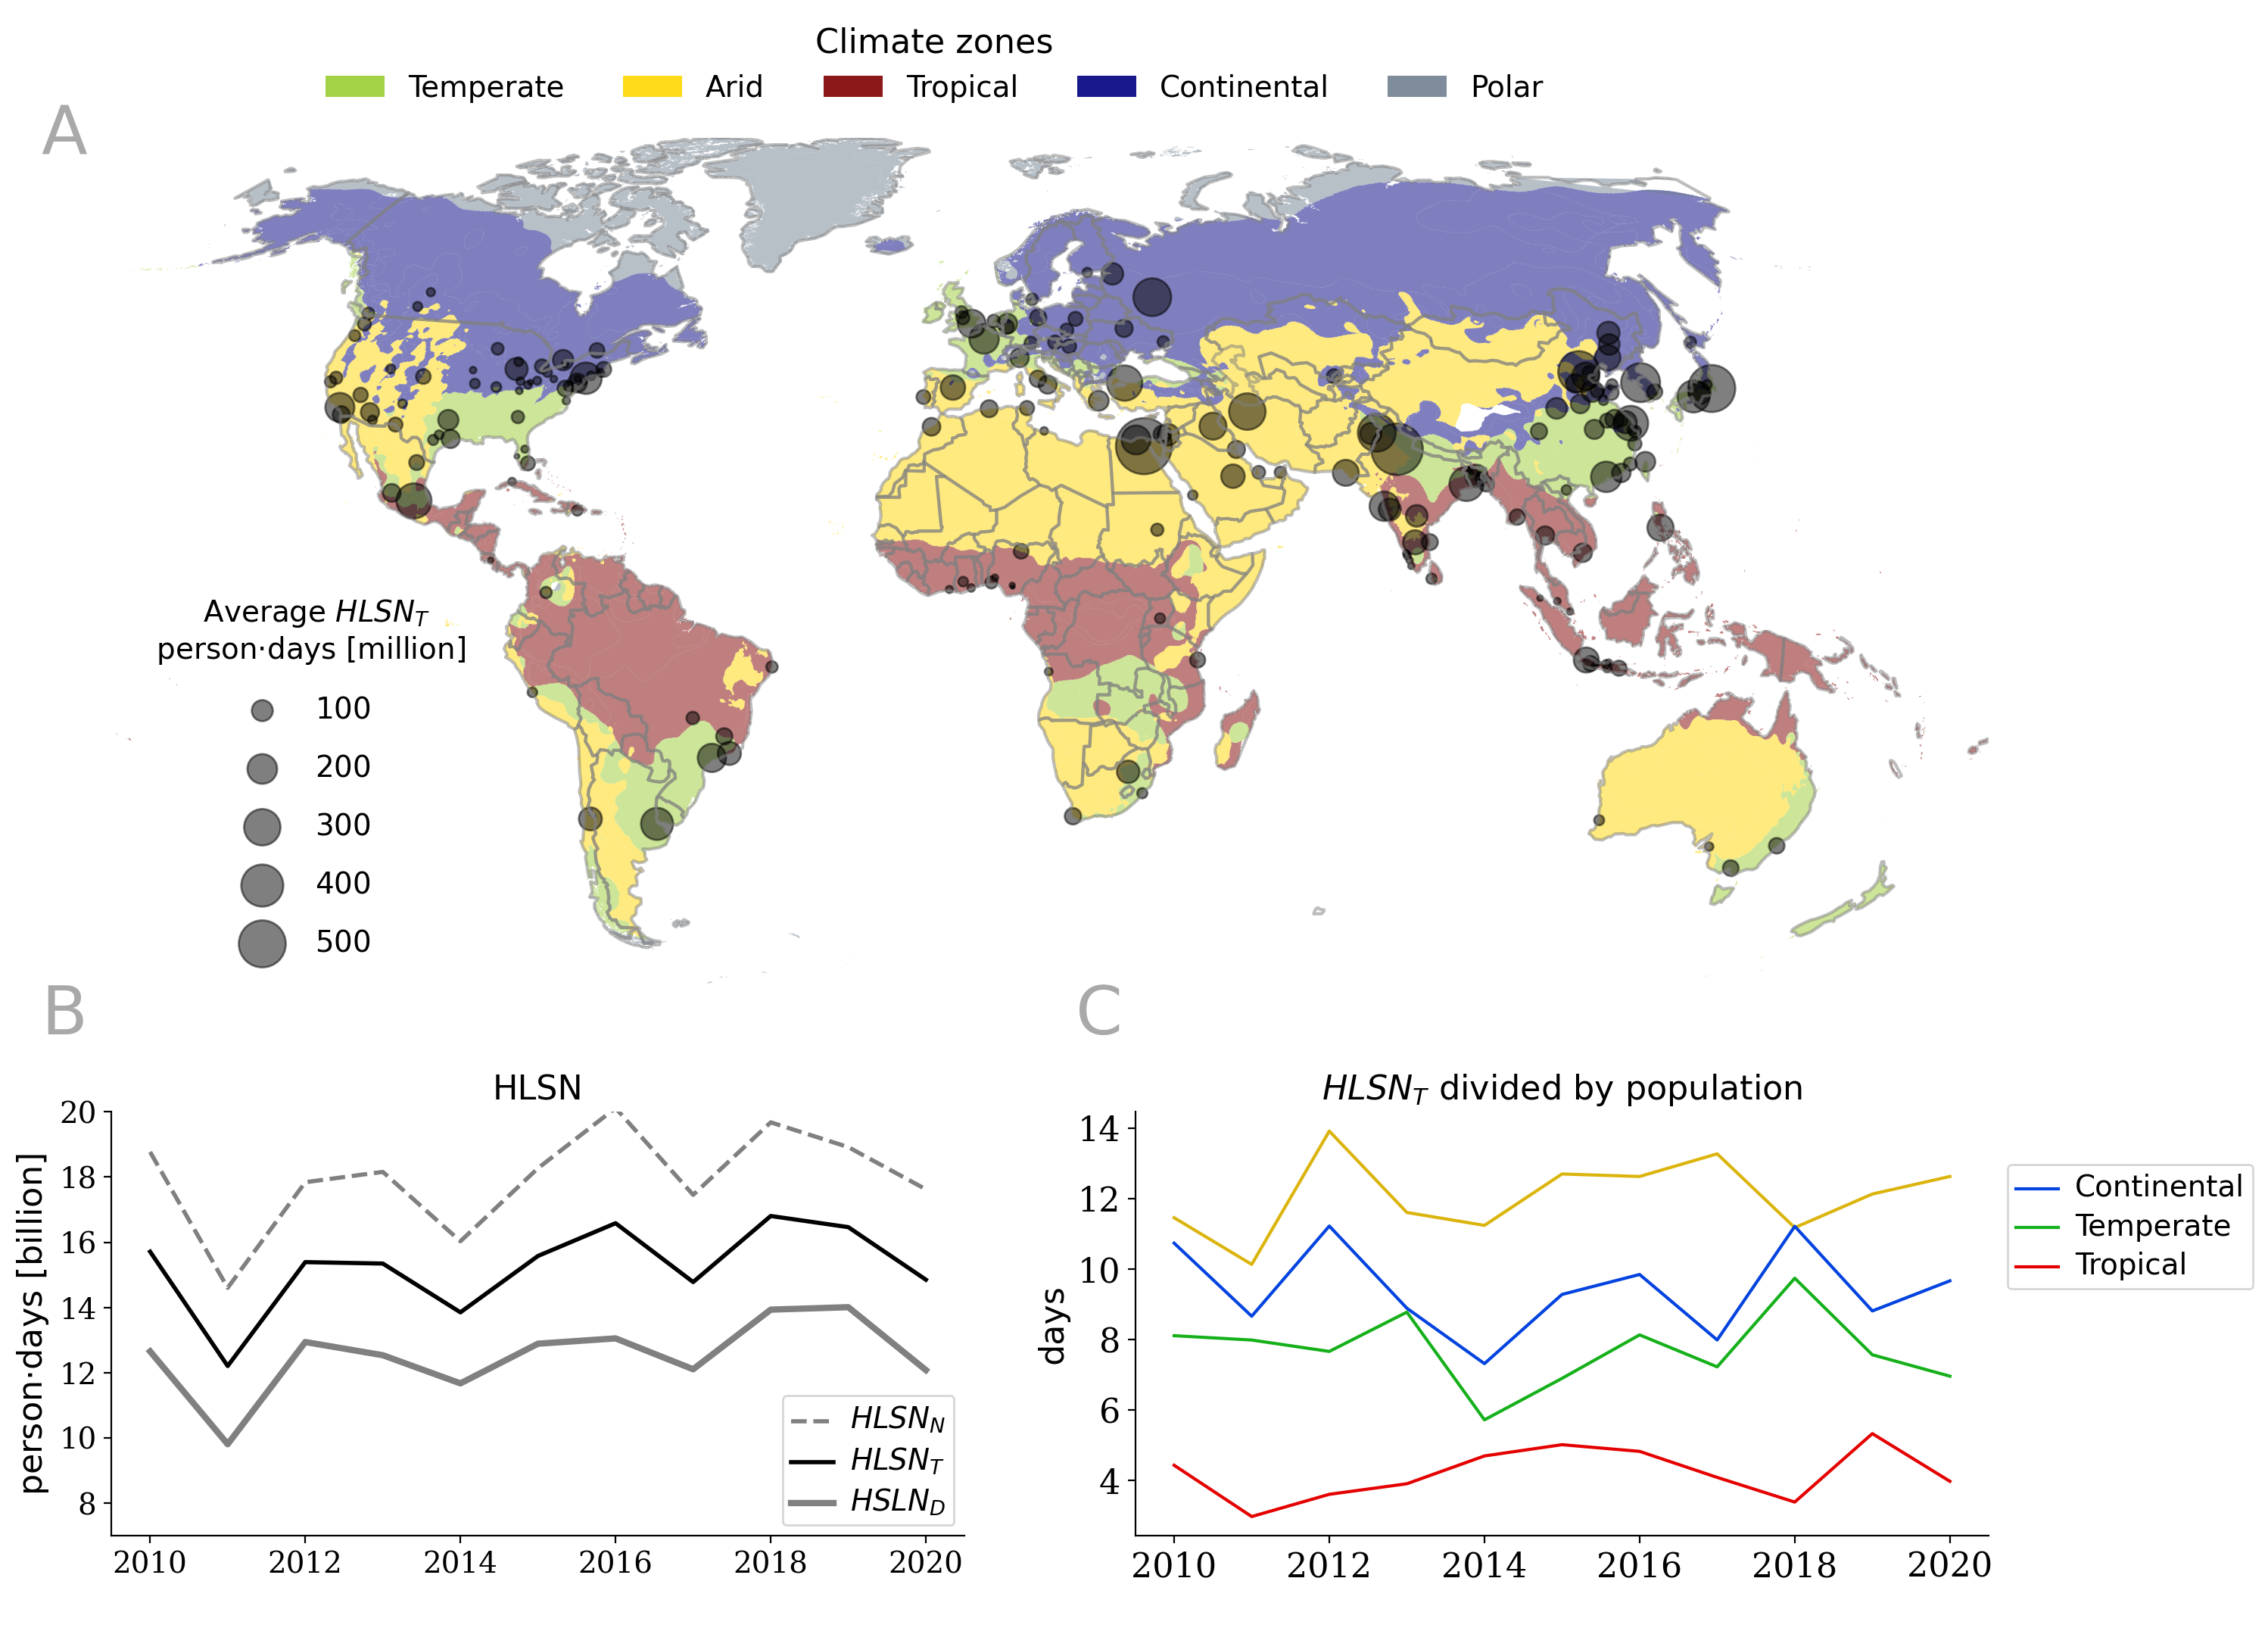

In [6]:
divnorm=colors.TwoSlopeNorm(vmin=-5., vcenter=0., vmax=1)
fs = 16
fs1 = 14
f = plt.figure(figsize=(16,12))
#gs = GridSpec(2, 3, width_ratios=[1, 1.5, 1], height_ratios=[2.5, 1], wspace=0.1, hspace=0)

gs = gridspec.GridSpec(2, 2, height_ratios=[2,1], wspace=0.2)

ax = f.add_subplot(gs[0, :])
ax.axis('off')
##################################### climate ##########################################
kg.plot(column='climate',ax=ax,cmap=cmap,markersize=1,legend=True,alpha=0.5, 
       legend_kwds={'fontsize':fs1, 'frameon':False, 'loc':3})
#world.plot(ax=ax1, color='#DDD')
world.boundary.plot(ax=ax, color='gray', alpha=0.3)
dfEP_mean = dfEP.groupby(['city', 'X', 'Y'])['ep'].mean().reset_index()
plt.scatter(dfEP_mean['X'], dfEP_mean['Y'], s=dfEP_mean['ep']/1e6, color='black', alpha=0.5)

##################################### Fake plot ###############################################
### Fake plot
lst = [100, 200, 300, 400, 500]
labels = [r'$100$',r'$200$', r'$300$',r'$400$',  r'$500$']
for i, s in enumerate(lst):
    ax.scatter([-10*10500000],[-10*10500000], c='black' , s=s, alpha=0.5, label=labels[i])
    
legend1 = ax.legend(scatterpoints=1, frameon=False,
        labelspacing=1, loc='lower left', fontsize= fs1,
        bbox_to_anchor=(0,0),
        title="       Average "+r'$HLSN_T$'+"\n"+r'  person'+r'$\cdot$''days'+' [million]',
        title_fontsize=fs1)
f.gca().add_artist(legend1)

### Add second legend
list_of_climates =  ['Temperate', 'Arid', 'Tropical', 'Continental', 'Polar']

color_dict = {'Temperate':'yellowgreen',
              'Arid':'gold',
              'Tropical':'maroon',
              'Continental':'navy', 
              'Polar':'slategrey'}

# Creates a rectangular patch for each contaminant, using the colors above
patch_list =[]
for ion in list_of_climates:
    label = ion.capitalize()
    color = color_dict[ion]
    patch_list.append(patches.Patch(facecolor=color, 
                                    label=label, 
                                    alpha=0.9, 
                                    linewidth=0, 
                                    edgecolor='black'))
world.boundary.plot(ax=ax, color='gray', alpha=0.3)
# Creates a legend with the list of patches above.
ax.legend(handles=patch_list, fontsize=fs1, loc='lower left',frameon=False,
        bbox_to_anchor = (0.1,1.01), title_fontsize=fs, title='Climate zones', ncol=5)

cb_ax = f.axes[-1]
cb_ax.tick_params(labelsize=fs1)
ax.set_xlim([-16646156, 19646156]);
ax.set_ylim([-7018754, 9328438]);



ax.text(-1.8*10000000, 0.9*10000000, 'A', fontsize=fs*2, color='darkgray');
ax.text(-1.8*10000000, -0.8*10000000, 'B', fontsize=fs*2, color='darkgray')
ax.text(0.2*10000000, -0.8*10000000, 'C', fontsize=fs*2, color='darkgray')



############## B ########################################################################################
ax2 = plt.subplot(gs[1,0])
ax2=setFont(ax2, 'serif', fs1)
dfEP_sum = dfEP.groupby('year')['ep'].sum().reset_index()
dfEP_sum = dfEP.groupby('year')['epnights'].sum().reset_index()
dfEP_sum.plot(x='year', y='epnights',ax=ax2, label=r'$HLSN_N$', color='gray', lw=2, ls='--')
dfEP_sum = dfEP.groupby('year')['ep'].sum().reset_index()
dfEP_sum.plot(x='year', y='ep',ax=ax2, label=r'$HLSN_T$', color='black', lw=2)
dfEP_sum = dfEP.groupby('year')['epdays'].sum().reset_index()
dfEP_sum.plot(x='year', y='epdays',ax=ax2, label=r'$HSLN_D$', color='gray', lw=3)
#z = np.polyfit(dfEP_sum.year, dfEP_sum.ep, 1)
#p = np.poly1d(z)
#ax2.plot(dfEP_sum.year, p(dfEP_sum.year))



#dftemporal_.plot(x='year', y='TEn',ax=ax2)

ax2.legend(loc=4)
plt.setp(ax2.get_legend().get_texts(), fontsize=fs1) # for legend text
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False);
ax2.set_title('HLSN', size=fs)
ax2.set_ylabel('person'+r'$\cdot$'+ 'days'+' [billion]', size=fs)
formatter = FuncFormatter(billions)
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylim([7e9, 20e9])
ax2.set_xlabel(' ');

#ax3 = ax2.twinx()
#dfEP.groupby('year')['pop'].sum().plot(ax=ax3)
#ax3.spines['top'].set_visible(False);



############## C ########################################################################################
ax3 = plt.subplot(gs[1,1])
dfEP['epp'] = dfEP['ep']/dfEP['pop']

dfEP_sum = dfEP.groupby(['year', 'climate'])['epp'].mean().reset_index()
dfEP_sum['epp'] = dfEP_sum['epp']
ax3 = setFont(ax3, 'serif', fs)
colorss=['gold', 'blue', 'green', 'red']
sns.lineplot(x='year', y='epp', hue='climate', data=dfEP_sum, ax=ax3, palette=sns.xkcd_palette(colorss))
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False);

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False);
ax3.set_title(r'$HLSN_T$'+ ' divided by population', size=fs)
ax3.set_ylabel('days', size=fs)
ax3.set_xlabel(' ')
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles=handles[1:], labels=labels[1:], bbox_to_anchor=(1.01,.9))
plt.setp(ax3.get_legend().get_texts(), fontsize=fs1); # for legend text;
#ax3.yaxis.set_major_formatter(formatter)
ax3.set_xlabel(' ')


In [14]:
#f.savefig('../figures_revision/Figure2.pdf', bbox_inches = 'tight')